In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

,Time (in s),Radial Velocity (in m/s)
0,0,0.062949
1,100000,0.066467
2,200000,0.066514
3,300000,0.062524
4,400000,0.059928
...,...,...
9995,999500000,0.053482
9996,999600000,0.048298
9997,999700000,0.046089
9998,999800000,0.051194


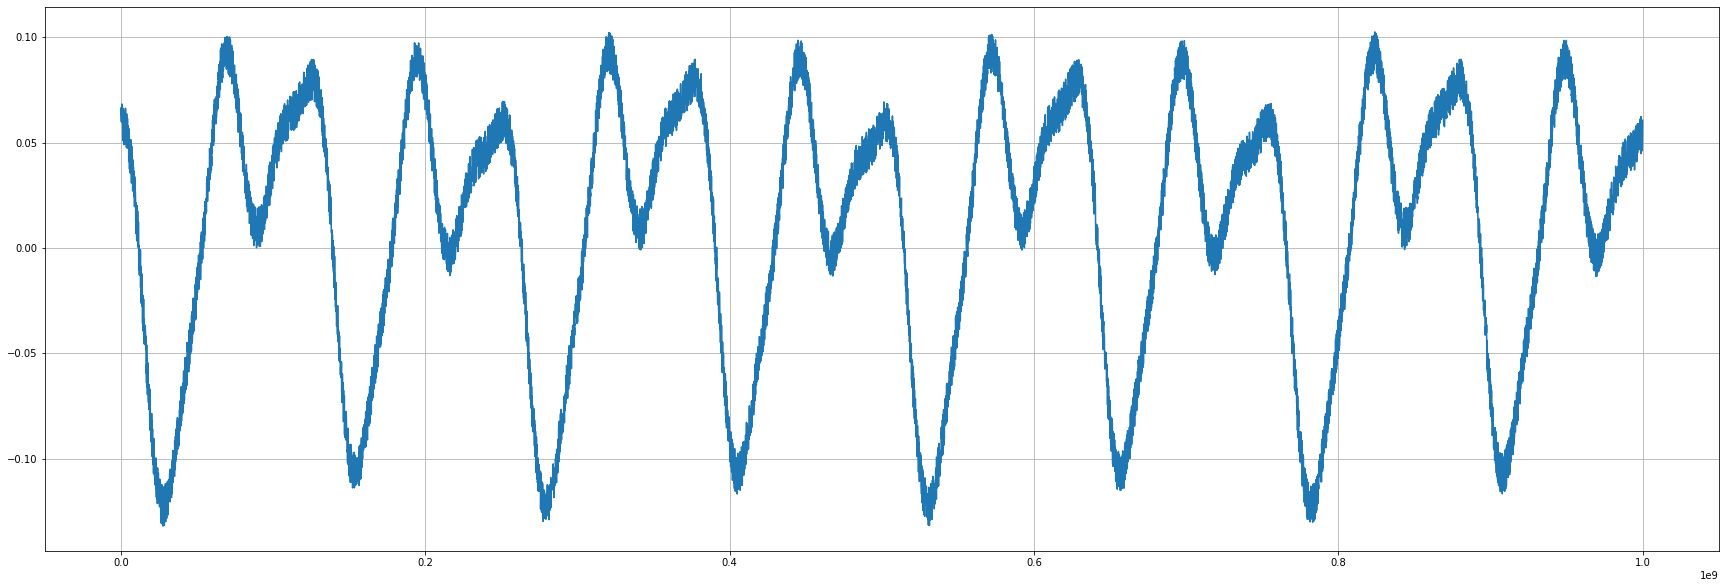

In [2]:
df = pd.read_csv("astrometry_data.csv")


time = df[df.columns[0]]
vel = df[df.columns[1]]
plt.figure(figsize=(30,10))
plt.plot(time,vel)
plt.grid()
df


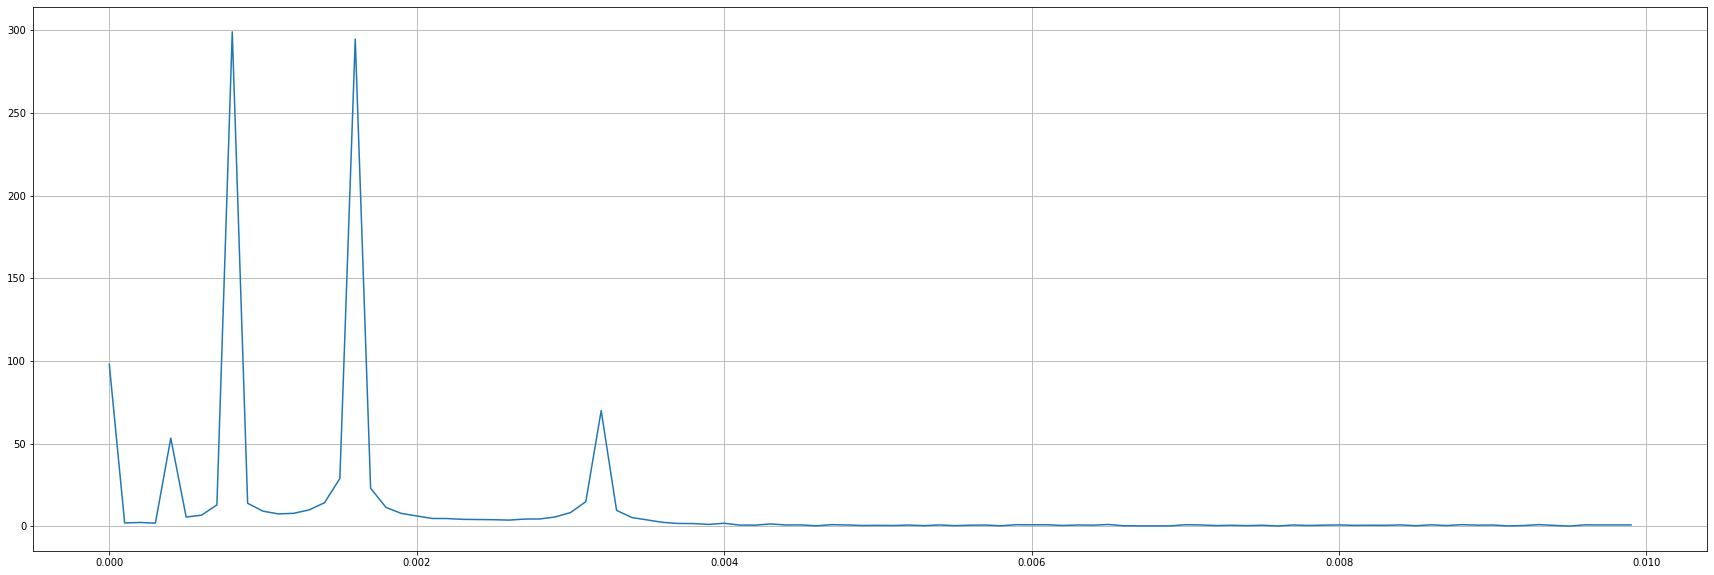

In [3]:
fp =np.fft.rfft(vel)
ff = np.fft.rfftfreq( len(vel))


plt.figure(figsize = (30,10) )
plt.plot( ff[0:100], np.abs(fp)[0:100])
plt.grid()



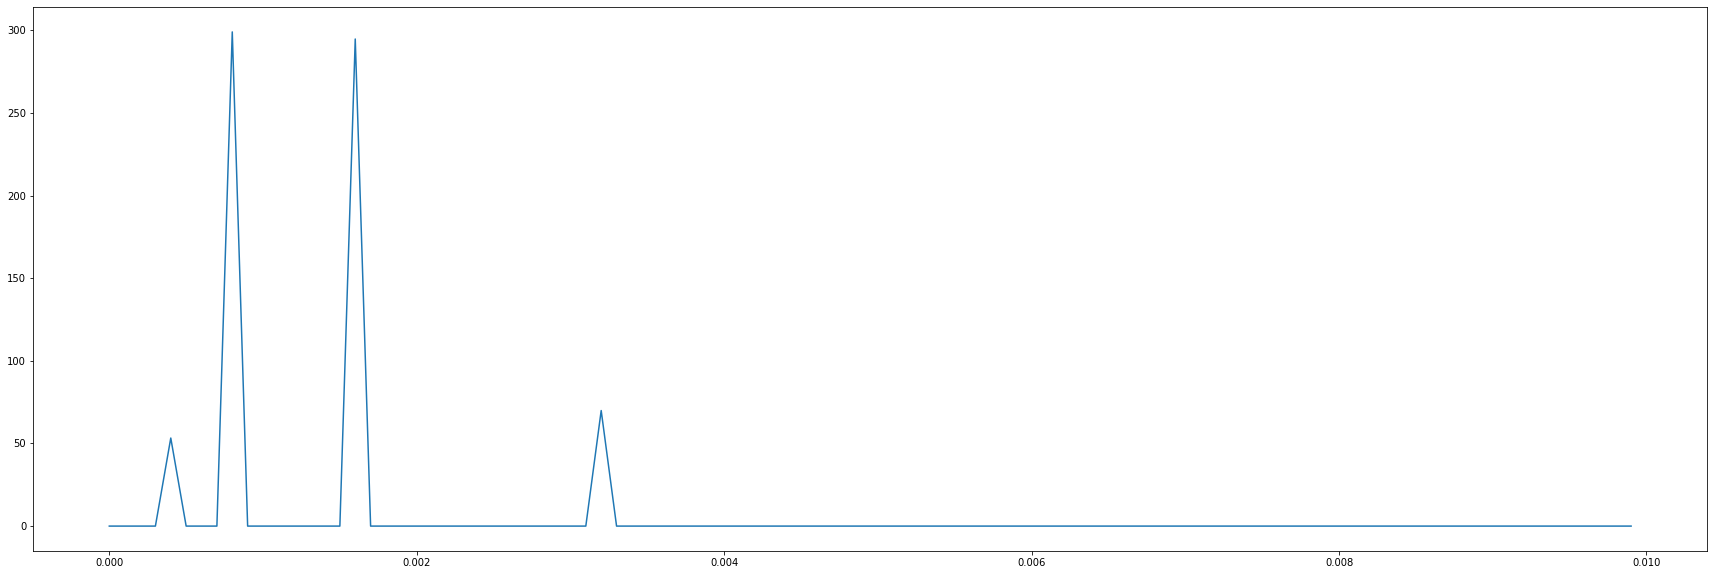

In [4]:
idx = np.where(np.abs(fp)<50)
fp[idx] = 0
fp[0] = 0
plt.figure(figsize=(30,10))

plt.plot(ff[0:100],np.abs(fp)[0:100])




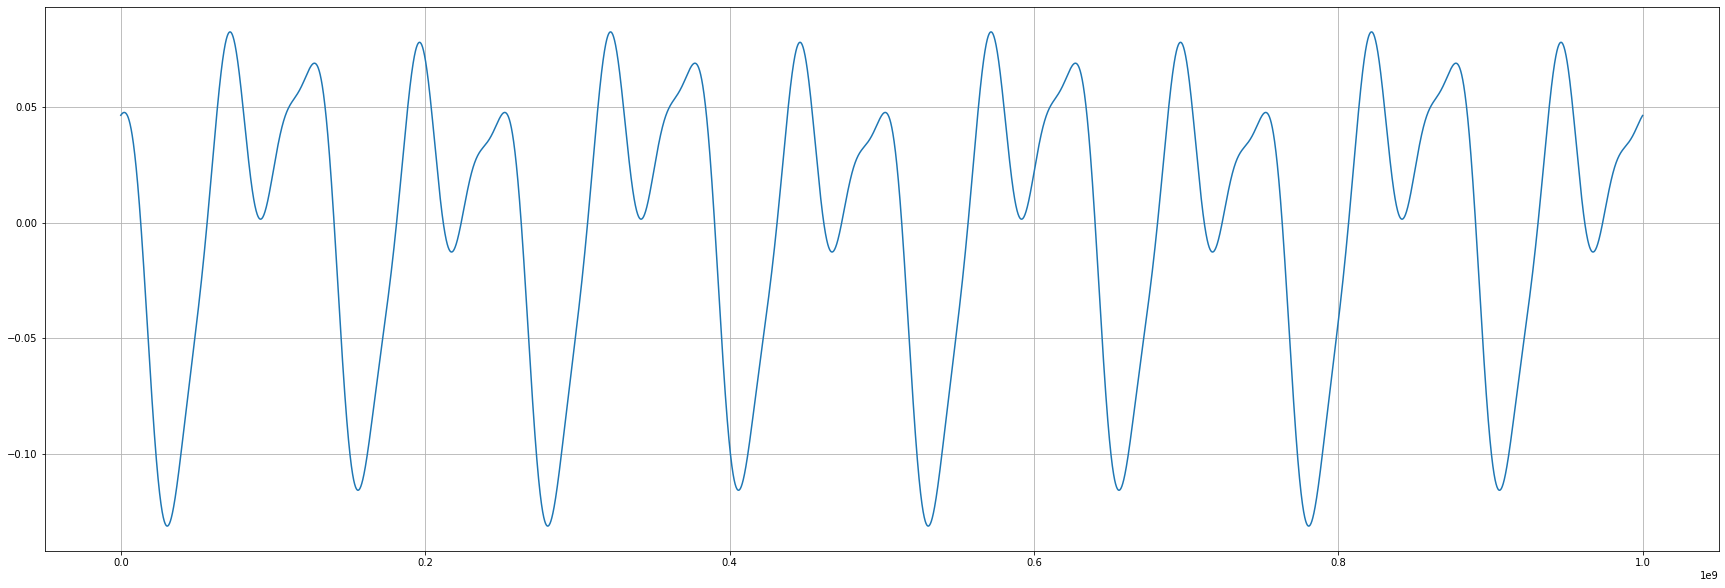

In [5]:
new_vel = np.fft.irfft(fp)
plt.figure(figsize=(30,10))
plt.plot(time,new_vel)
plt.grid()

In [6]:
index = np.where(np.abs(fp) > 50)[0]
index


array([ 4,  8, 16, 32], dtype=int64)

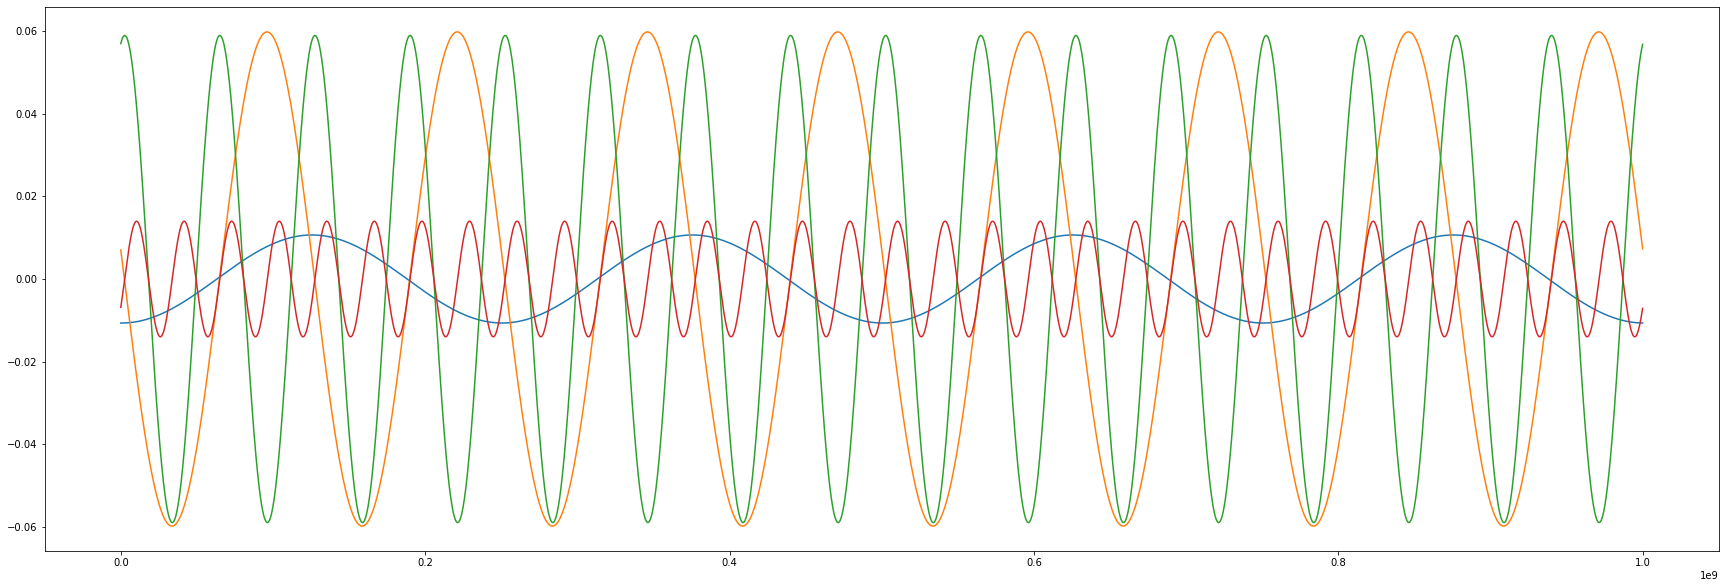

In [7]:
plt.figure(figsize = (30,10))
for i in range(4):
    _fp = fp.copy()
    _idx = np.where(np.abs(_fp) != np.abs(_fp[index[i]]) )
    _fp[_idx] = 0
    _inv = np.fft.irfft(_fp) 
    plt.plot(time,_inv)    

     
   

In [8]:
from scipy.signal import argrelextrema
M_star = 1e30
G = 6.67*1e-11

for i in range(4):
    print("EXOPLANET NUMBER: #",i+1)
    _fp = fp.copy()    
    _idx = np.array(np.where(np.abs(_fp) != np.abs(_fp[index[i]]) ))
    _fp[_idx] = 0
    _inv = np.fft.irfft(_fp) 
    maximas = argrelextrema(_inv, np.greater)[0]  
    ##print(maximas)
    Period =[]
    Period = [time[maximas[x+1]] - time[maximas[x]] for x in range(len(maximas) -1 )] ##stores difference between successive maximas
    #print(Period)
    sum =0
    for j in range(len(maximas) - 1):
        sum = sum + Period[j]
    mean_time = sum/(len(maximas)-1) #avg time period
    Years = mean_time/(3600*24*365) #time of revolution in years
    
    omega = (np.pi)*2/mean_time  # angular velocity
    r = np.cbrt(G*M_star/(omega*omega)) #approximation r>>R.. i.e stars orbit is too small due to the planet
    AU = r/(1.49*1e11) ## convert to astronomical units
    
    R_star = np.amax(_inv)/omega  ##Radius
    m_planet = M_star*R_star/r
    m_planet = m_planet/(6*1e24)   ##mass
    print("Mass of Exoplanet        : ",round(m_planet,2)," Earth masses")
    print("Radius of Revolution     : ", round(AU,2)," AU")
    print("Orbital Revolution Period: ",round(Years,2),"Earth Years.")

EXOPLANET NUMBER: # 1
Mass of Exoplanet        :  0.15  Earth masses
Radius of Revolution     :  3.17  AU
Orbital Revolution Period:  7.93 Earth Years.
EXOPLANET NUMBER: # 2
Mass of Exoplanet        :  0.67  Earth masses
Radius of Revolution     :  2.0  AU
Orbital Revolution Period:  3.96 Earth Years.
EXOPLANET NUMBER: # 3
Mass of Exoplanet        :  0.52  Earth masses
Radius of Revolution     :  1.26  AU
Orbital Revolution Period:  1.98 Earth Years.
EXOPLANET NUMBER: # 4
Mass of Exoplanet        :  0.1  Earth masses
Radius of Revolution     :  0.79  AU
Orbital Revolution Period:  0.99 Earth Years.
